In [168]:
# creating folder to save files 
import os,json
os.makedirs('Data/',exist_ok=True) 
# Confirm folder created
os.listdir("Data/")

['superhero_info - superhero_info.csv',
 'superhero_powers - superhero_powers.csv']

In [169]:
import pandas as pd

In [170]:
filename1="Data/superhero_info - superhero_info.csv"
df1=pd.read_csv(filename1)
df1.head(5)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [171]:
df1[['Hero','Publisher']] = df1['Hero|Publisher'].str.split('|',expand=True)

In [172]:
df1=df1.drop(columns=['Hero|Publisher'])
df1.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [173]:
df1.loc[0,'Measurements']

"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [174]:
df1['Measurements'] = df1['Measurements'].str.replace("'",'"')
df1['Measurements'] = df1['Measurements'].apply(json.loads)

In [175]:
df1.loc[0,'Measurements']

{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [176]:
measure = df1['Measurements'].apply(pd.Series)

In [177]:
df1 = pd.concat((df1, measure), axis = 1)
df1.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [178]:
height=df1['Height'].str.split(' ',expand=True)
weight=df1['Weight'].str.split(' ',expand=True)

In [179]:
df1['Height']=height[0]
df1['Weight']=weight[0]
df1.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0,122.0


In [180]:
df1=df1.drop(columns=['Measurements'])

In [181]:
df1=df1[['Hero','Publisher','Gender','Eye color','Race','Hair color','Height','Skin color','Alignment','Weight']]
df1.head()

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0
3,Abomination,Marvel Comics,Male,green,Human / Radiation,No Hair,203.0,Unknown,bad,441.0
4,Absorbing Man,Marvel Comics,Male,blue,Human,No Hair,193.0,Unknown,bad,122.0


In [182]:
filename2="Data/superhero_powers - superhero_powers.csv"
df2=pd.read_csv(filename2)
df2.head(5)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [183]:
df2['Powers']=df2['Powers'].str.split(',',expand=False)
df2.head()

,hero_names,Powers
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."


In [184]:
exploded = df2.explode('Powers')
exploded.head()

,hero_names,Powers
0,3-D Man,Agility
0,3-D Man,Super Strength
0,3-D Man,Stamina
0,3-D Man,Super Speed
1,A-Bomb,Accelerated Healing


In [185]:
## saving the unique values from the exploded column
cols_to_make = exploded['Powers'].dropna().unique()
for col in cols_to_make:
    df2[col] = df2['Powers'].apply(lambda x: col in x)
df2.head()

C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].apply(lambda x: col in x)
C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].apply(lambda x: col in x)
C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].apply(lambda x: col in x)
C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].apply(lambda x: col in x)
C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].apply(lambda x: col in x)
C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].apply(lambda x: col in x)
C:\Users\JoseH\AppData\Local\Temp\ipykernel_14912\1641631398.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

,hero_names,Powers,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,[Lantern Power Ring],False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [186]:
df2=df2.drop(columns=['Powers'])

In [187]:
df = pd.merge(df1, df2, left_on='Hero', right_on='hero_names', how='inner')


In [188]:
with pd.option_context("display.max_columns", None):
    display(df)

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,Super Breath,Dimensional Awareness,Flight,Size Changing,Teleportation,Magic,Dimensional Travel,Molecular Manipulation,Energy Manipulation,Power Cosmic,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Heat Resistance,Matter Absorption,Regeneration,Stealth,Power Suit,Energy Blasts,Energy Beams,Heat Generation,Danger Sense,Phasing,Force Fields,Hypnokinesis,Invisibility,Enhanced Senses,Jump,Shapeshifting,Elasticity,Substance Secretion,Enhanced Hearing,Adaptation,Gliding,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Weapon-based Powers,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Psionic Powers,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Toxin and Disease Control,Empathy,Animal Control,Darkforce Manipulation,Time Manipulation,Reality Warping,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Omnilingualism,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Astral Travel,Precognition,Intangibility,Illusions,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Omnitrix,Omnipotent,Possession,Energy Resistance,Vision - Cryo,Mind Control,Mind Blast,Clairvoyance,Probability Manipulation,Death Touch,Electrokinesis,Gravity Control,Technopath/Cyberpath,Radar Sense,Astral Projection,Cloaking,Telepathy Resistance,Mind Control Resistance,Hyperkinesis,Spatial Awareness,Radiation Control,Radiation Absorption,Magic Resistance,Element Control,Plant Control,Terrakinesis,Power Sense,Wind Control,Qwardian Power Ring,Echolocation,Resurrection,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0,A-Bomb,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,Abe Sapien,True,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [189]:
df=df.drop(columns=['hero_names'])
with pd.option_context("display.max_columns", None):
    display(df)

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,Super Breath,Dimensional Awareness,Flight,Size Changing,Teleportation,Magic,Dimensional Travel,Molecular Manipulation,Energy Manipulation,Power Cosmic,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Heat Resistance,Matter Absorption,Regeneration,Stealth,Power Suit,Energy Blasts,Energy Beams,Heat Generation,Danger Sense,Phasing,Force Fields,Hypnokinesis,Invisibility,Enhanced Senses,Jump,Shapeshifting,Elasticity,Substance Secretion,Enhanced Hearing,Adaptation,Gliding,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Weapon-based Powers,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Psionic Powers,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Toxin and Disease Control,Empathy,Animal Control,Darkforce Manipulation,Time Manipulation,Reality Warping,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Omnilingualism,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Astral Travel,Precognition,Intangibility,Illusions,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Omnitrix,Omnipotent,Possession,Energy Resistance,Vision - Cryo,Mind Control,Mind Blast,Clairvoyance,Probability Manipulation,Death Touch,Electrokinesis,Gravity Control,Technopath/Cyberpath,Radar Sense,Astral Projection,Cloaking,Telepathy Resistance,Mind Control Resistance,Hyperkinesis,Spatial Awareness,Radiation Control,Radiation Absorption,Magic Resistance,Element Control,Plant Control,Terrakinesis,Power Sense,Wind Control,Qwardian Power Ring,Echolocation,Resurrection,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,True,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [190]:
df['Weight'] = df['Weight'].astype(float)
df['Height'] = df['Height'].astype(float)

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [192]:
a=df.groupby('Super Speed')['Weight'].mean()
a

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

The heroes who have super speed are heavier than the ones who don't have super speed.

In [193]:
a=a.reset_index()

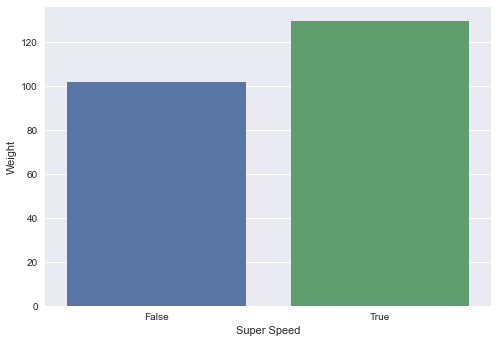

In [194]:
sns.barplot(data=a,x='Super Speed',y='Weight');

In [195]:
df.groupby('Publisher')['Height'].mean()
#Average hegiht per Publisher

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

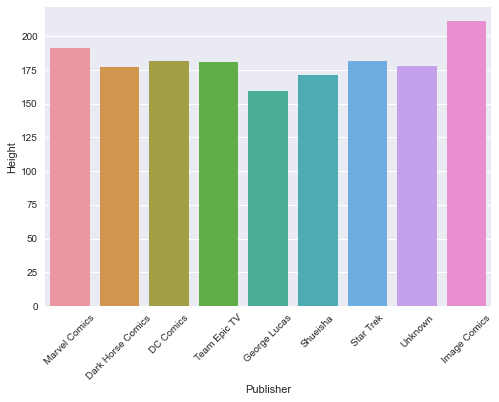

In [196]:
sns.barplot(data=df,x='Publisher',y='Height', ci=None);
plt.xticks(rotation = 45);